In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("bank-marketing.csv")

In [3]:
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# DATA DESCRIPTION

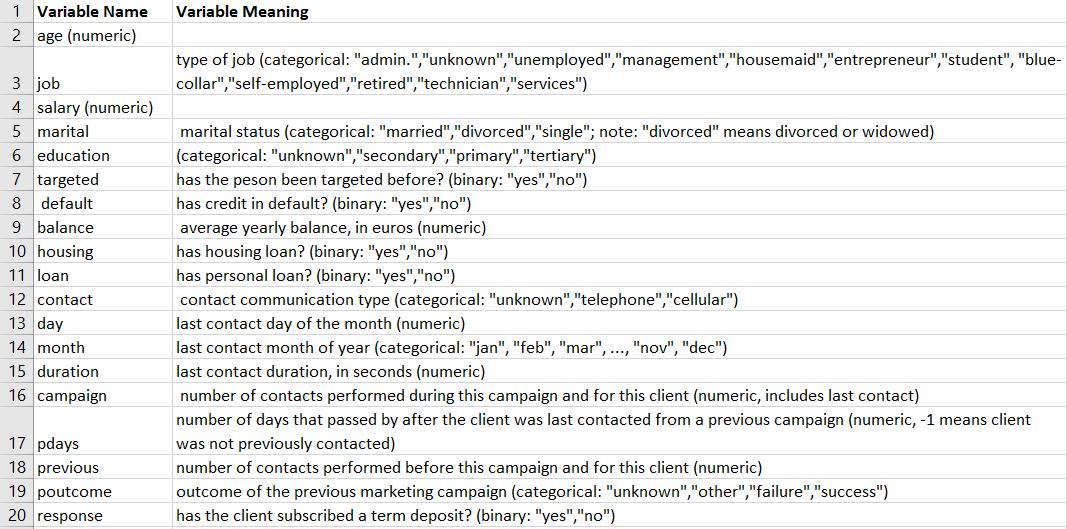

# PROBLEM STATEMENT

1.	Measuring the effectiveness of the campaign
2.	Deep dive into which sections of the audience the campaign performed well, and where it didn’t

Test a lot of hypotheses and ask questions that make business sense as well. Some examples – 
1.	Do customers with higher education have higher propensity to subscribe to a term deposit?
2.	Does current balance have an effect on their subscription?


In [4]:
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# DATA CLEANING

In [41]:
df.isnull().sum()

age          0
job          0
salary       0
marital      0
education    0
targeted     0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
dtype: int64

***There is no null value***

In [6]:
df.dtypes

age           int64
job          object
salary        int64
marital      object
education    object
targeted     object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
response     object
dtype: object

***All datatypes are in the way they are required to be***

In [7]:
df.describe(include='all') #To make and understand analysis easier.

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
count,45211.000000,45211,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,NaN,3,4,2,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,NaN,married,secondary,yes,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,NaN,27214,23202,37091,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,57006.171065,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,32085.718415,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,0.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,20000.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,60000.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,70000.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [9]:
df.columns

Index(['age', 'job', 'salary', 'marital', 'education', 'targeted', 'default',
       'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'response'],
      dtype='object')

In [3]:
cols= ['age', 'job', 'salary', 'marital', 'education', 'targeted', 'default',
       'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'response']

In [4]:
cat_cols = ['job', 'marital', 'education', 'targeted', 'default',
        'housing', 'loan', 'contact','response','month']

In [5]:
num_cols =  ['age',  'salary','balance','day', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', ]

In [32]:
for i in cols:
    print(i, '   ----->   ', df[i].value_counts())

age    ----->    32    2084
31    1990
33    1964
34    1926
35    1887
      ... 
90       2
92       2
93       2
95       2
94       1
Name: age, Length: 77, dtype: int64
job    ----->    blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
Name: job, dtype: int64
salary    ----->    20000     9732
100000    9458
60000     9176
50000     5171
70000     4154
55000     2264
120000    1487
8000      1303
16000     1240
4000       938
Name: salary, dtype: int64
marital    ----->    married     27011
single      12722
divorced     5190
Name: marital, dtype: int64
education    ----->    secondary    23131
tertiary     13262
primary       6800
unknown       1730
Name: education, dtype: int64
targeted    ----->    yes    36944
no      7979
Name: targeted, dtype: int64
default    ----->    no     44110
yes

In [6]:
df.drop(df[df['job']=='unknown'].index,inplace=True) # we should drop unknown job titles as they can't be used.

In [7]:
df[df['job']=='unknown']

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response


In [8]:
df.drop(df[df['salary']== 0].index,inplace=True) # we should drop salary as 0 as they can't be used.

In [9]:
df[df['salary']== 0]

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response


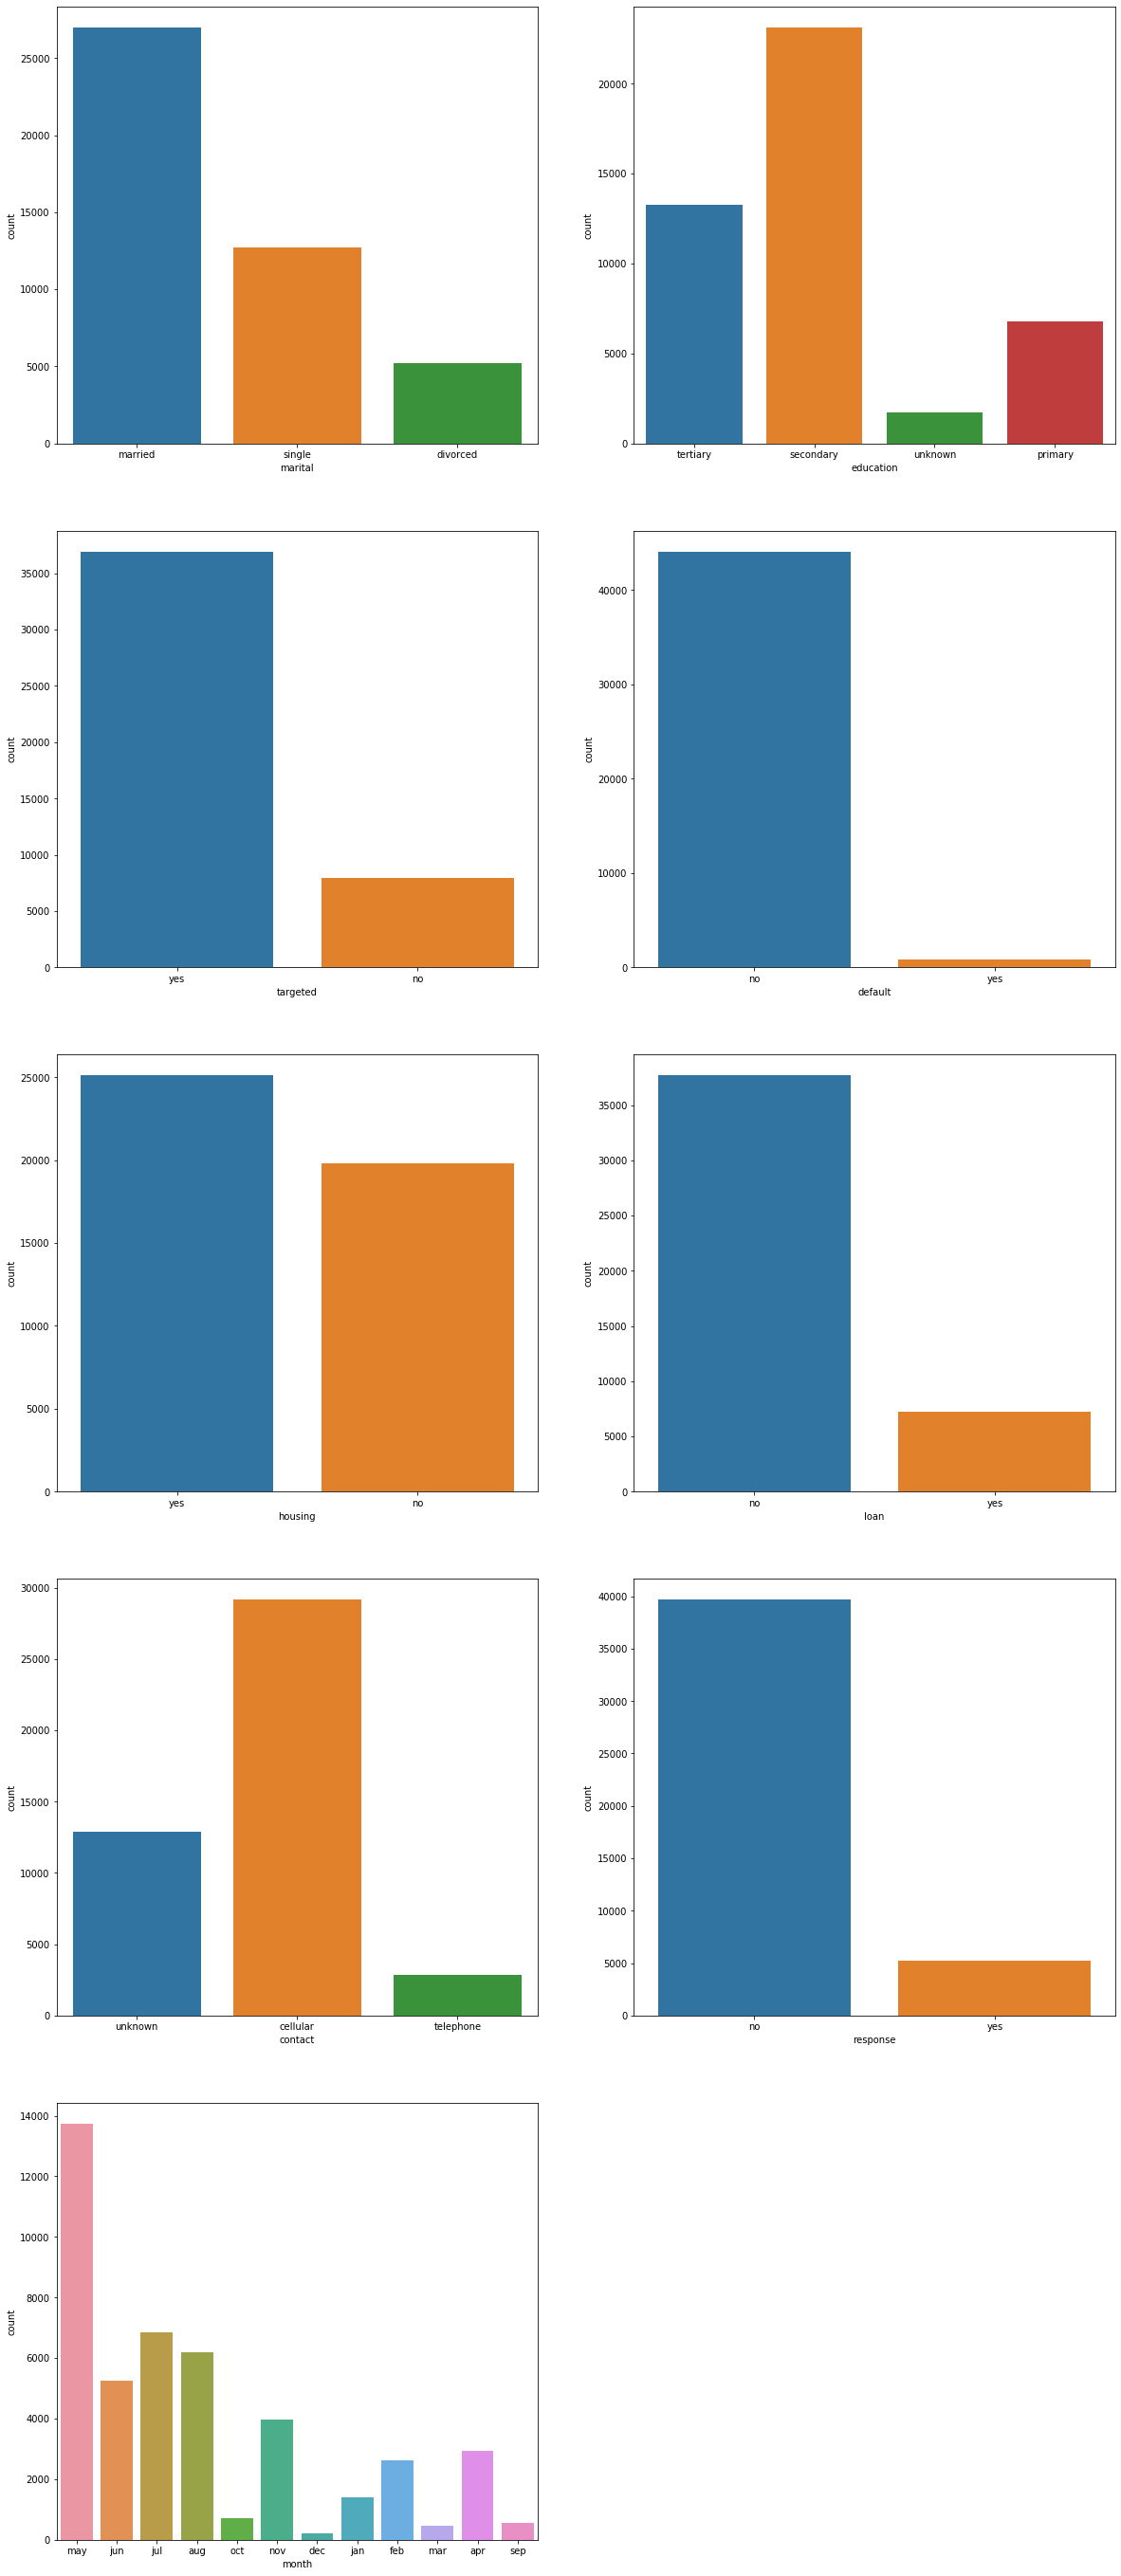

In [47]:
fig = plt.figure(figsize=(20,100))

for i in range(1,len(cat_cols)):
    ax = fig.add_subplot(len(cat_cols), 2, i)
    g = sns.countplot(df[cat_cols[i]])

1. We can see that majority people in the data are married.
2. Majority people are educated either secondary or tertiary.
3. Majority people hae been targeted before.
4. Majority dont have default in their accounts.
5. There are almost equal number of people who have and dont have housing loan.
6. There are very less number of people having personal loan.
7. Mainly people are contacted on their cellular devices.
8. There are very few converts that have taken place.
9. Maximum contacts have been made in the month of May, June, July and August.

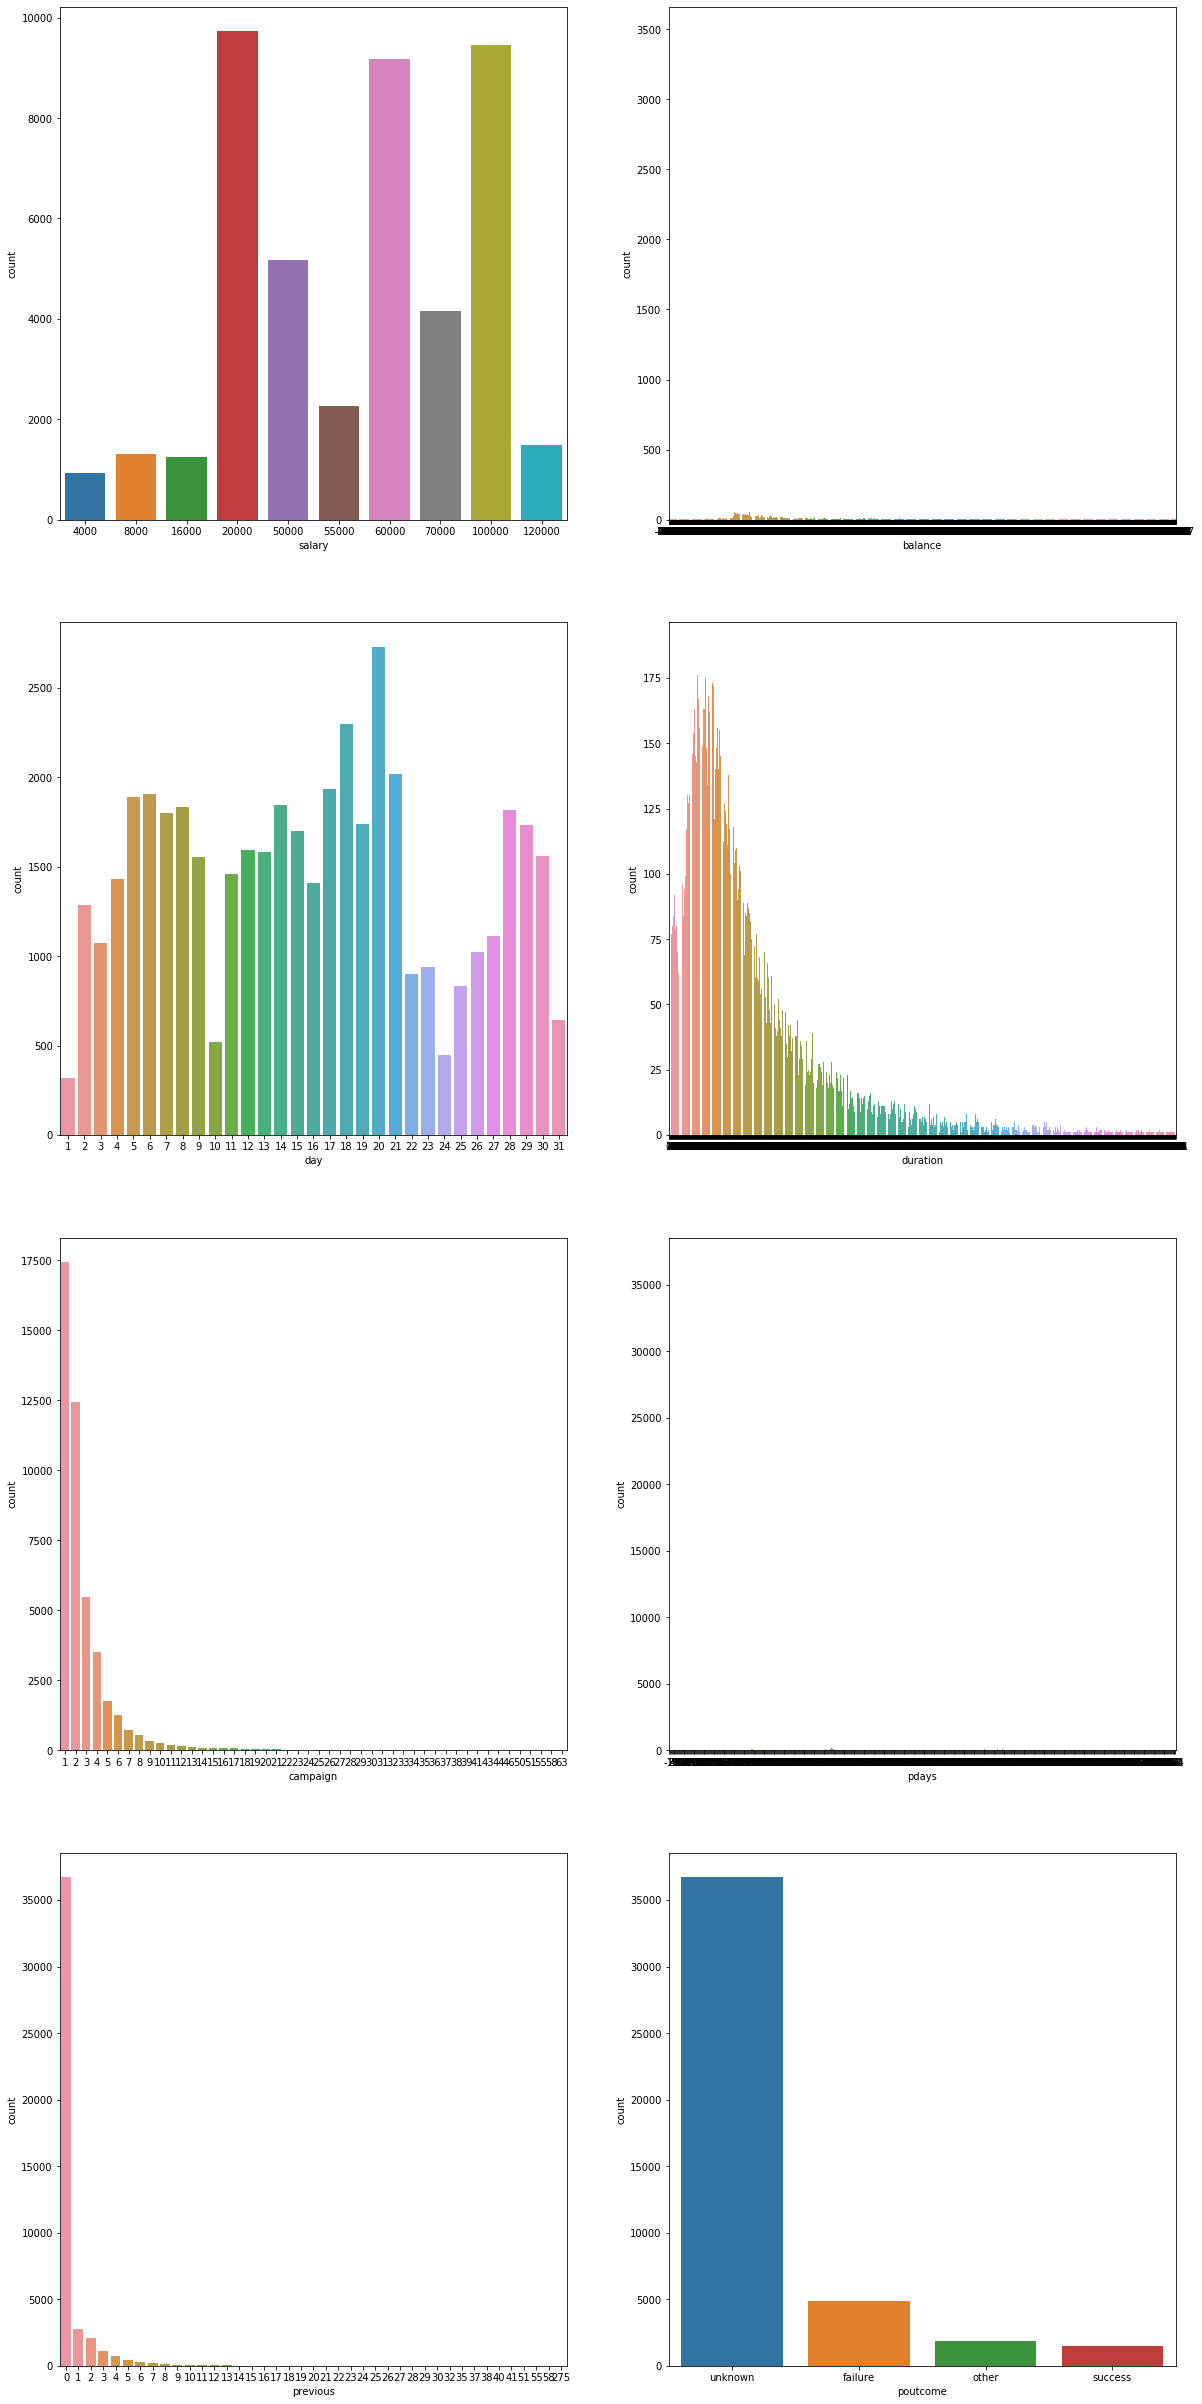

In [41]:
fig = plt.figure(figsize=(20,100))

for i in range(1,len(num_cols)):
    ax = fig.add_subplot(len(num_cols), 2, i)
    g = sns.countplot(df[num_cols[i]])

# VISUALIZATION

Text(0, 0.5, 'Count')

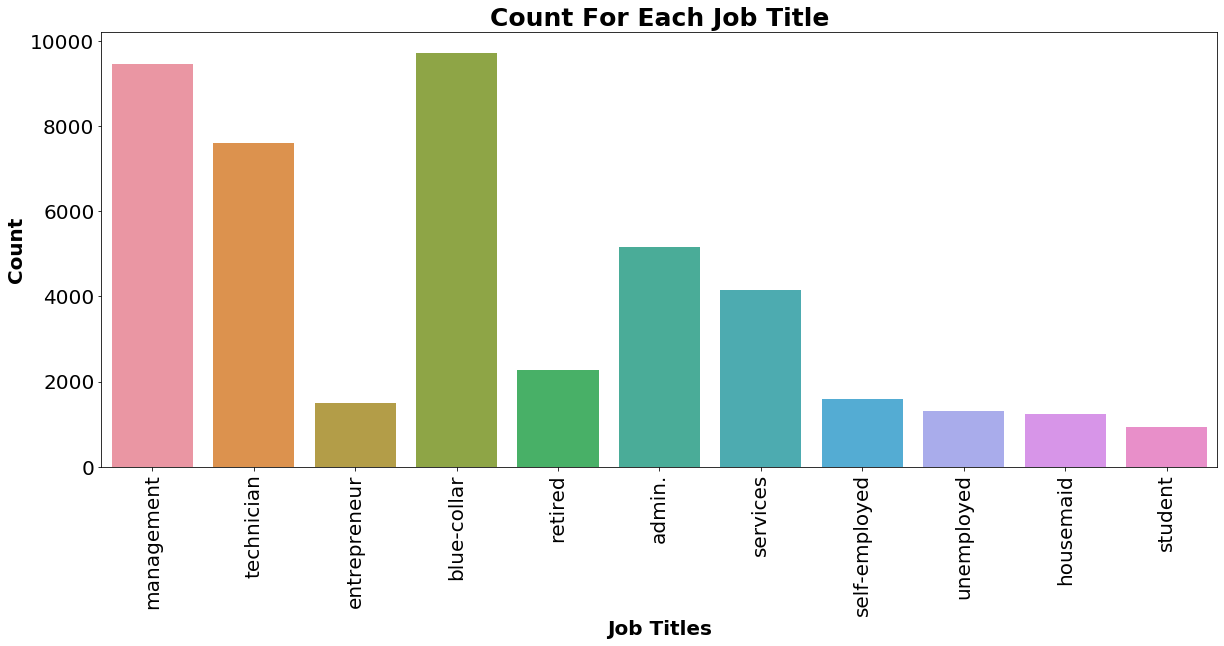

In [51]:
fig = plt.figure(figsize=(20,8))
fig1 = sns.countplot(x='job',data=df)
plt.xticks(rotation='vertical', fontsize=20)
plt.yticks( fontsize=20)
fig1.set_title('Count For Each Job Title', fontsize=25,fontweight='bold')
fig1.set_xlabel('Job Titles', fontsize=20, fontweight='bold')
fig1.set_ylabel('Count', fontsize=20, fontweight='bold')

Text(0, 0.5, 'Salary in thousands(euros)')

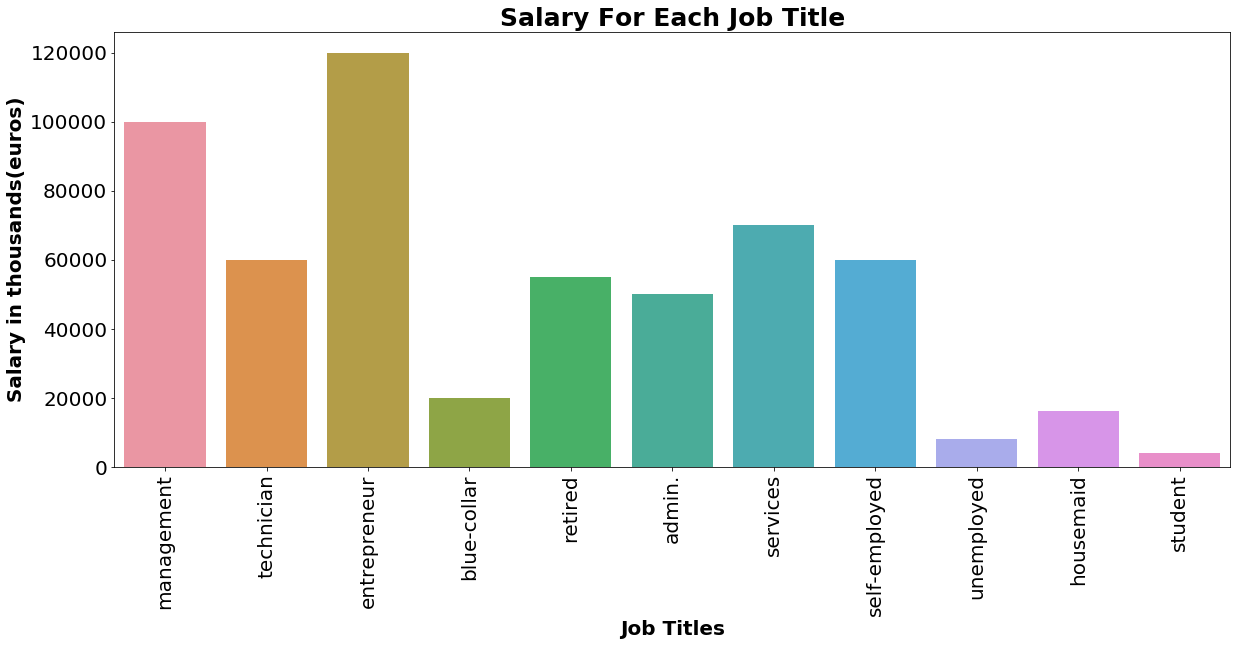

In [55]:
fig = plt.figure(figsize=(20,8))
fig1 = sns.barplot(x='job',y='salary',data=df)
plt.xticks(rotation='vertical', fontsize=20)
plt.yticks( fontsize=20)
fig1.set_title('Salary For Each Job Title', fontsize=25,fontweight='bold')
fig1.set_xlabel('Job Titles', fontsize=20, fontweight='bold')
fig1.set_ylabel('Salary in thousands(euros)', fontsize=20, fontweight='bold')

We can see that salary is highest in **Entrepreneur Sector which is around 12K Euros**.

WE can conclude thet one with **maximum salary i.e. Entrepreneur, 120000 Euros are least present in the data. Maximum people belong to Blue-collar with salary of 20000 Euros.**

Text(0, 0.5, 'Responses')

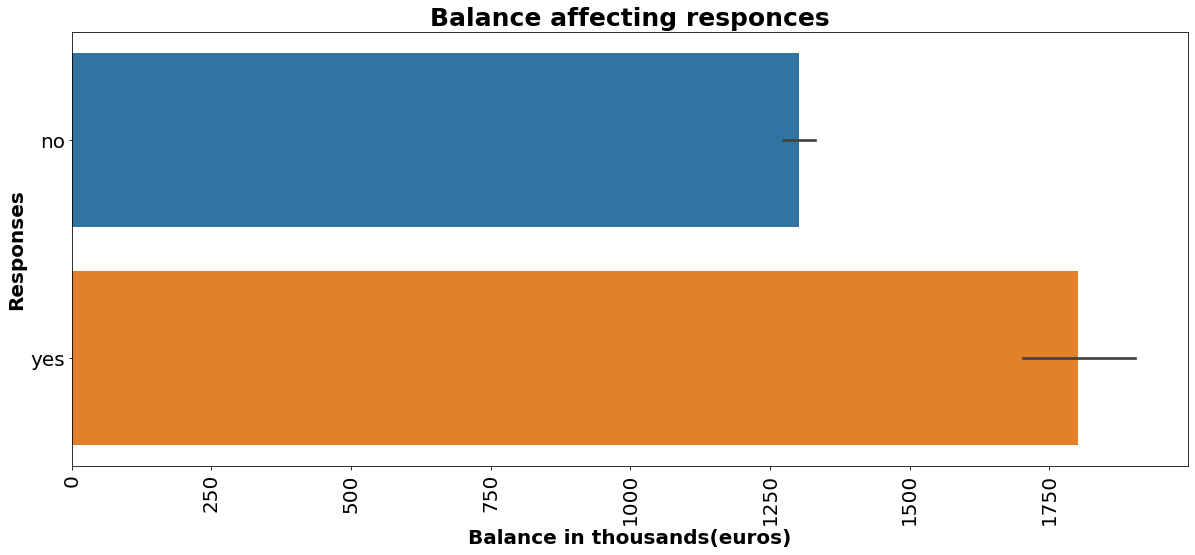

In [43]:
fig = plt.figure(figsize=(20,8))
a=df.groupby('balance').mean()
fig1 = sns.barplot(x='balance',y='response',data=df)
plt.xticks(rotation='vertical', fontsize=20)
plt.yticks( fontsize=20)
fig1.set_title('Balance affecting responces', fontsize=25,fontweight='bold')
fig1.set_xlabel('Balance in thousands(euros)', fontsize=20, fontweight='bold')
fig1.set_ylabel('Responses', fontsize=20, fontweight='bold')

In [57]:
pivot = df.pivot_table(index=['response'], values=['balance'], aggfunc='mean')

In [58]:
pivot

,balance
response,
no,1301.108904
yes,1801.494767


We can see that **current balance in account doesnt affect on the subscription to that extent since the average balance of yes and no is nearly same.**

Text(0.5, 0, 'Responses')

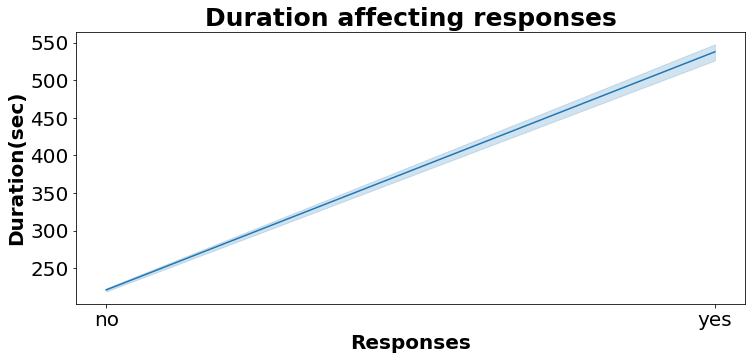

In [59]:
fig = plt.figure(figsize=(12,5))
fig1=sns.lineplot(x='response',y='duration',data=df)
plt.xticks(rotation='horizontal', fontsize=20)
plt.yticks( fontsize=20)
fig1.set_title('Duration affecting responses', fontsize=25,fontweight='bold')
fig1.set_ylabel('Duration(sec)', fontsize=20, fontweight='bold')
fig1.set_xlabel('Responses', fontsize=20, fontweight='bold')

We can see that **more the amount of time spent more is the chances of conversion**.

Text(0.5, 0, 'Responses')

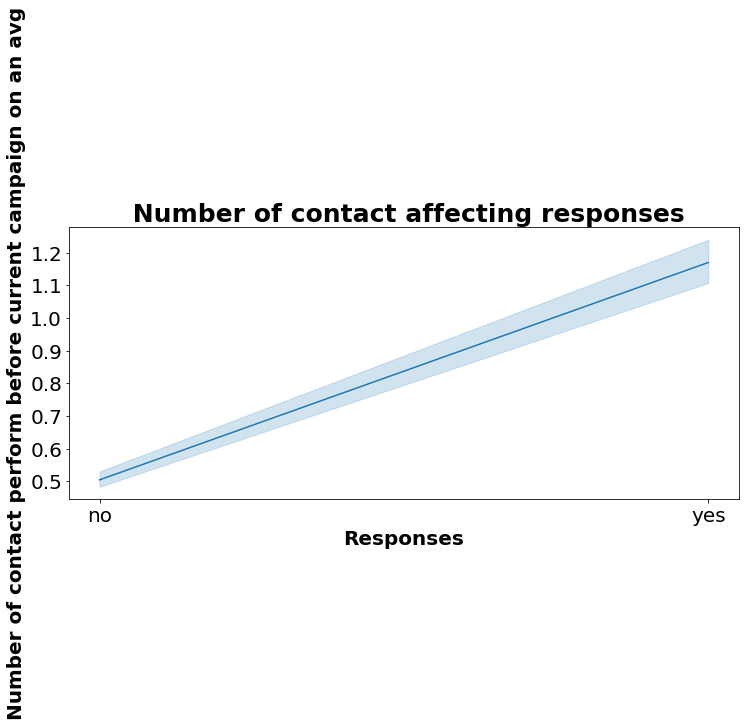

In [36]:
fig = plt.figure(figsize=(12,5))
fig1=sns.lineplot(x='response',y='previous',data=df)
plt.xticks(rotation='horizontal', fontsize=20)
plt.yticks( fontsize=20)
fig1.set_title(' Number of contact affecting responses', fontsize=25,fontweight='bold')
fig1.set_ylabel('Number of contact perform before current campaign on an avg', fontsize=20, fontweight='bold')
fig1.set_xlabel('Responses', fontsize=20, fontweight='bold')

We can see that on an avg convertion rate is high for the ones who were contacted earlier. 

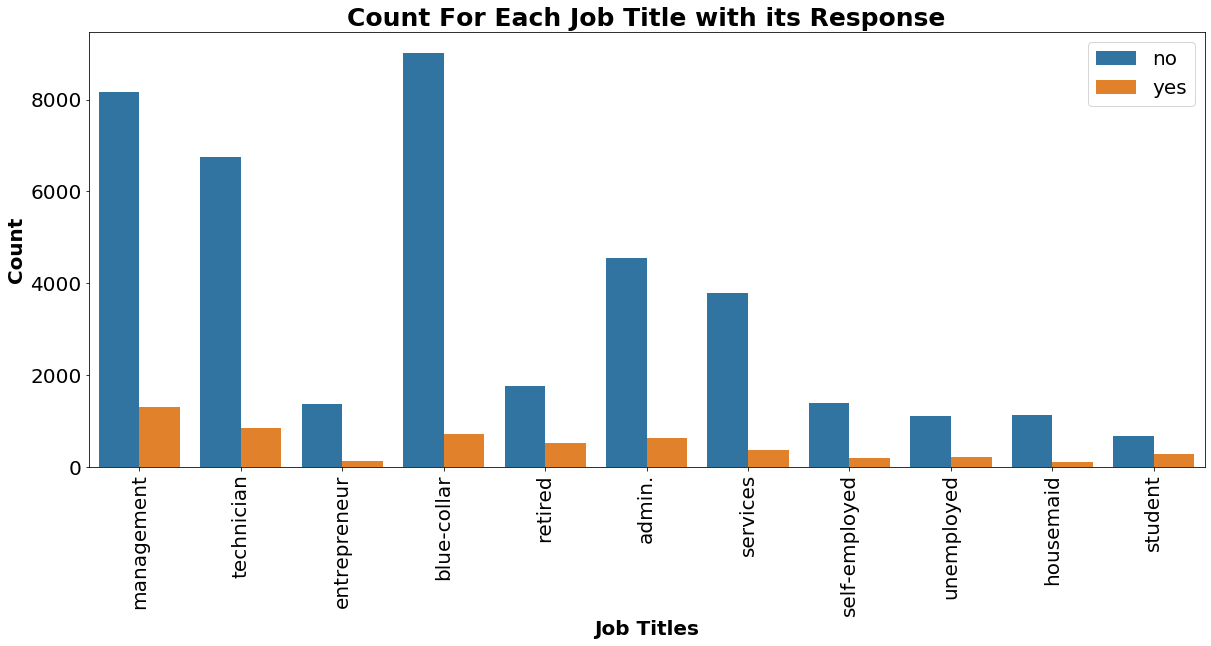

In [47]:
fig = plt.figure(figsize=(20,8))
fig1 = sns.countplot(x='job',hue='response',data=df,)
plt.xticks(rotation='vertical', fontsize=20)
plt.yticks( fontsize=20)
fig1.set_title('Count For Each Job Title with its Response', fontsize=25,fontweight='bold')
fig1.set_xlabel('Job Titles', fontsize=20, fontweight='bold')
fig1.set_ylabel('Count', fontsize=20, fontweight='bold')
plt.legend(fontsize=20)

Maximum converts are in the **Management Sector**. Maximum data that was present was of **blue-collar but we can see that its conversion rate is very low**.

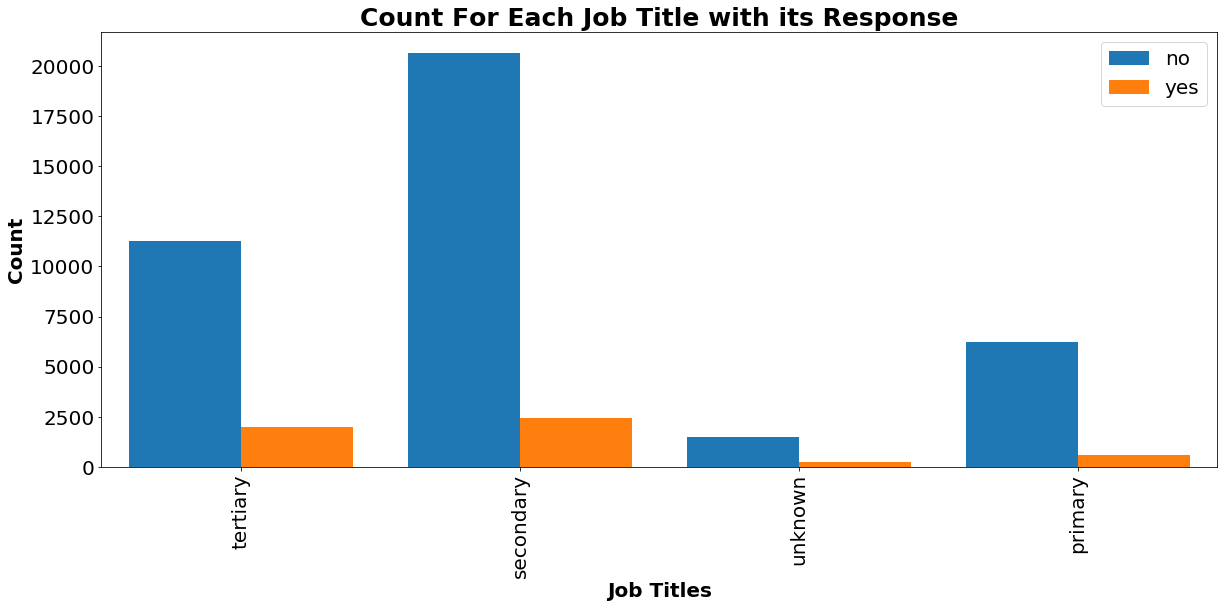

In [34]:
fig = plt.figure(figsize=(20,8))
fig1 = sns.countplot(x='education',hue='response',data=df,saturation=1)
plt.xticks(rotation='vertical', fontsize=20)
plt.yticks( fontsize=20)
fig1.set_title('Count For Each Job Title with its Response', fontsize=25,fontweight='bold')
fig1.set_xlabel('Job Titles', fontsize=20, fontweight='bold')
fig1.set_ylabel('Count', fontsize=20, fontweight='bold')
plt.legend(fontsize=20)

We can see that maximum converts are at Tertiary Education sector in camparision of negetive response. Hence **customers with higher education have higher propensity to subscribe to a term deposit**.

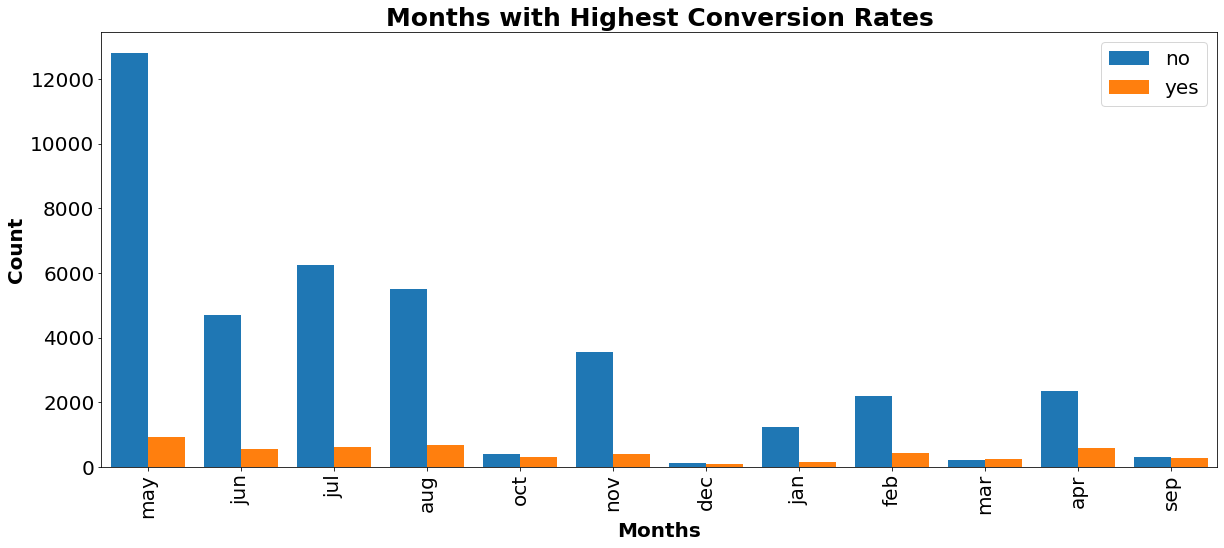

In [44]:
fig = plt.figure(figsize=(20,8))
fig1 = sns.countplot(x='month',hue='response',data=df,saturation=1)
plt.xticks(rotation='vertical', fontsize=20)
plt.yticks( fontsize=20)
fig1.set_title('Months with Highest Conversion Rates', fontsize=25,fontweight='bold')
fig1.set_xlabel('Months', fontsize=20, fontweight='bold')
fig1.set_ylabel('Count', fontsize=20, fontweight='bold')
plt.legend(fontsize=20)

**Maximum subscriptions have been made in months of April, May, June, July and August.**

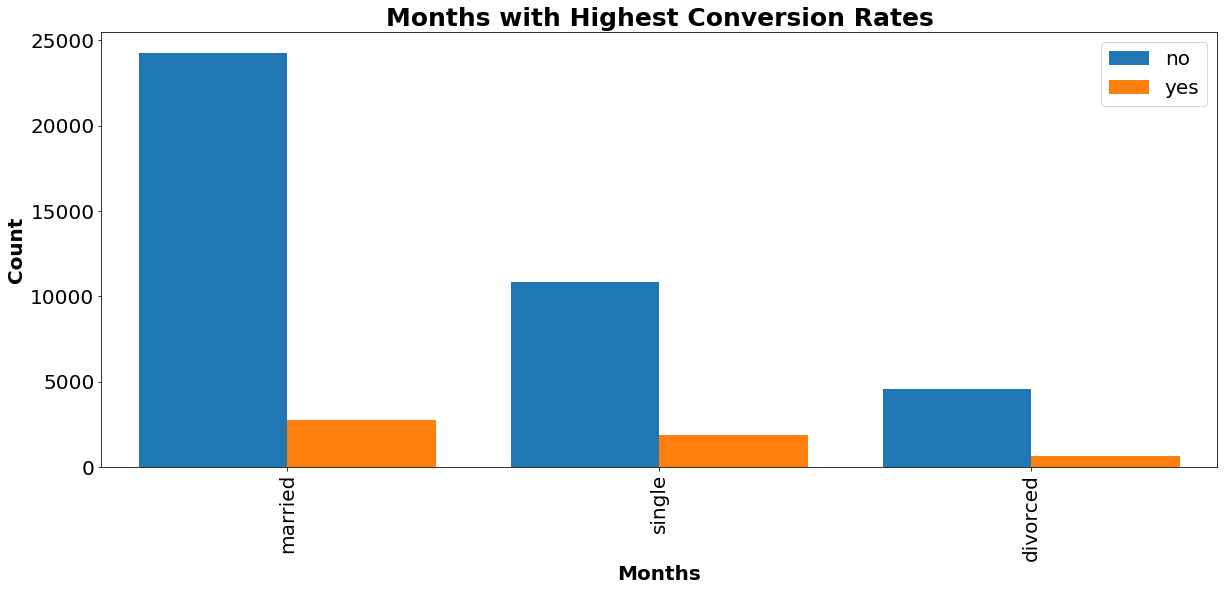

In [45]:
fig = plt.figure(figsize=(20,8))
fig1 = sns.countplot(x='marital',hue='response',data=df,saturation=1)
plt.xticks(rotation='vertical', fontsize=20)
plt.yticks( fontsize=20)
fig1.set_title('Months with Highest Conversion Rates', fontsize=25,fontweight='bold')
fig1.set_xlabel('Months', fontsize=20, fontweight='bold')
fig1.set_ylabel('Count', fontsize=20, fontweight='bold')
plt.legend(fontsize=20)

We can see that **Maritial Status doesnt affect subsciption rates.**

# CONCLUSION

1.Salary is highest in entrepreneur Sector.

2.Average salary is same as that of maximum salary.So we can conclude that everyone in their respective sectors recieve same amount of salary.

3.Current balance in account doesnt affect on the subscription to that extent since the average balance of yes and no is nearly same.

4.We can see that more the amount of time spent more is the chances of conversion.

5.We can see that on an avg convertion rate is high for the ones who were contacted earlier.

6.Customers with higher education have higher propensity to subscribe to a term deposit

7.Maximum subscriptions have been made in months of April, May, June, July and August.

8.Maritial Status doesnt affect subsciption rates.

Best group to target is **Management and Technical sector in the month of July and August.**